In [20]:
# 데이터 불러오기
import numpy as np
import pandas as pd
columns=['year','domae','somae','ordomae','orsomae','sangmulga','somulga','1psodek','gdp','y']
#mandarine_consume = pd.read_excel('normal.xlsx', index_col='년도')
data = pd.read_csv('predict_consume1.csv',encoding = 'UTF-8',)
data.columns = columns
data.head()

,year,domae,somae,ordomae,orsomae,sangmulga,somulga,1psodek,gdp,y
0,1985,NaN,NaN,NaN,NaN,52.76,37.358,NaN,NaN,9.1
1,1986,NaN,NaN,NaN,NaN,41.75,33.855,NaN,NaN,NaN
2,1987,NaN,NaN,NaN,NaN,50.60,47.416,NaN,NaN,NaN
3,1988,NaN,NaN,NaN,NaN,58.17,45.652,NaN,NaN,NaN
4,1989,NaN,3660.666667,NaN,NaN,63.41,49.120,NaN,NaN,NaN


In [21]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       35 non-null     int64  
 1   domae      24 non-null     float64
 2   somae      27 non-null     float64
 3   ordomae    22 non-null     float64
 4   orsomae    22 non-null     float64
 5   sangmulga  34 non-null     float64
 6   somulga    35 non-null     float64
 7   1psodek    26 non-null     float64
 8   gdp        26 non-null     float64
 9   y          21 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.9 KB


In [22]:
data2 = data.dropna()
data2.head()

,year,domae,somae,ordomae,orsomae,sangmulga,somulga,1psodek,gdp,y
15,2000,7417.333333,11800.000000,14240.0,52580.0,58.74,55.410,61964.6448,72.119,11.9
17,2002,5312.000000,8866.666667,22410.0,63440.0,84.83,84.325,75338.7816,76.892,13.3
18,2003,9075.000000,26300.000000,17700.0,56280.0,57.45,63.620,82105.3168,79.544,13.0
19,2004,12609.000000,27000.000000,18720.0,58280.0,96.77,85.198,90825.8304,82.032,12.0
20,2005,12133.000000,16500.000000,16700.0,63520.0,143.35,106.735,95684.7528,82.887,13.1


In [23]:
data.corr()

,year,domae,somae,ordomae,orsomae,sangmulga,somulga,1psodek,gdp,y
year,1.000000,0.764349,0.851316,0.609877,-0.694839,0.454754,0.814571,0.990797,0.994077,0.361055
domae,0.764349,1.000000,0.812873,0.367531,-0.586843,0.223963,0.619246,0.752002,0.751101,-0.461744
somae,0.851316,0.812873,1.000000,0.311904,-0.481713,0.131533,0.521959,0.811755,0.828845,-0.476248
ordomae,0.609877,0.367531,0.311904,1.000000,-0.286179,0.332027,0.641034,0.596492,0.585343,0.160953
orsomae,-0.694839,-0.586843,-0.481713,-0.286179,1.000000,-0.286372,-0.529470,-0.693485,-0.664944,0.285416
sangmulga,0.454754,0.223963,0.131533,0.332027,-0.286372,1.000000,0.785183,0.249317,0.232670,0.248873
somulga,0.814571,0.619246,0.521959,0.641034,-0.529470,0.785183,1.000000,0.702352,0.660769,0.238208
1psodek,0.990797,0.752002,0.811755,0.596492,-0.693485,0.249317,0.702352,1.000000,0.982201,-0.233859
gdp,0.994077,0.751101,0.828845,0.585343,-0.664944,0.232670,0.660769,0.982201,1.000000,-0.190785
y,0.361055,-0.461744,-0.476248,0.160953,0.285416,0.248873,0.238208,-0.233859,-0.190785,1.000000


In [24]:
y = data2.iloc[:,-1]
X = data2.iloc[:,1:-1]

In [25]:
# 한글 폰트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

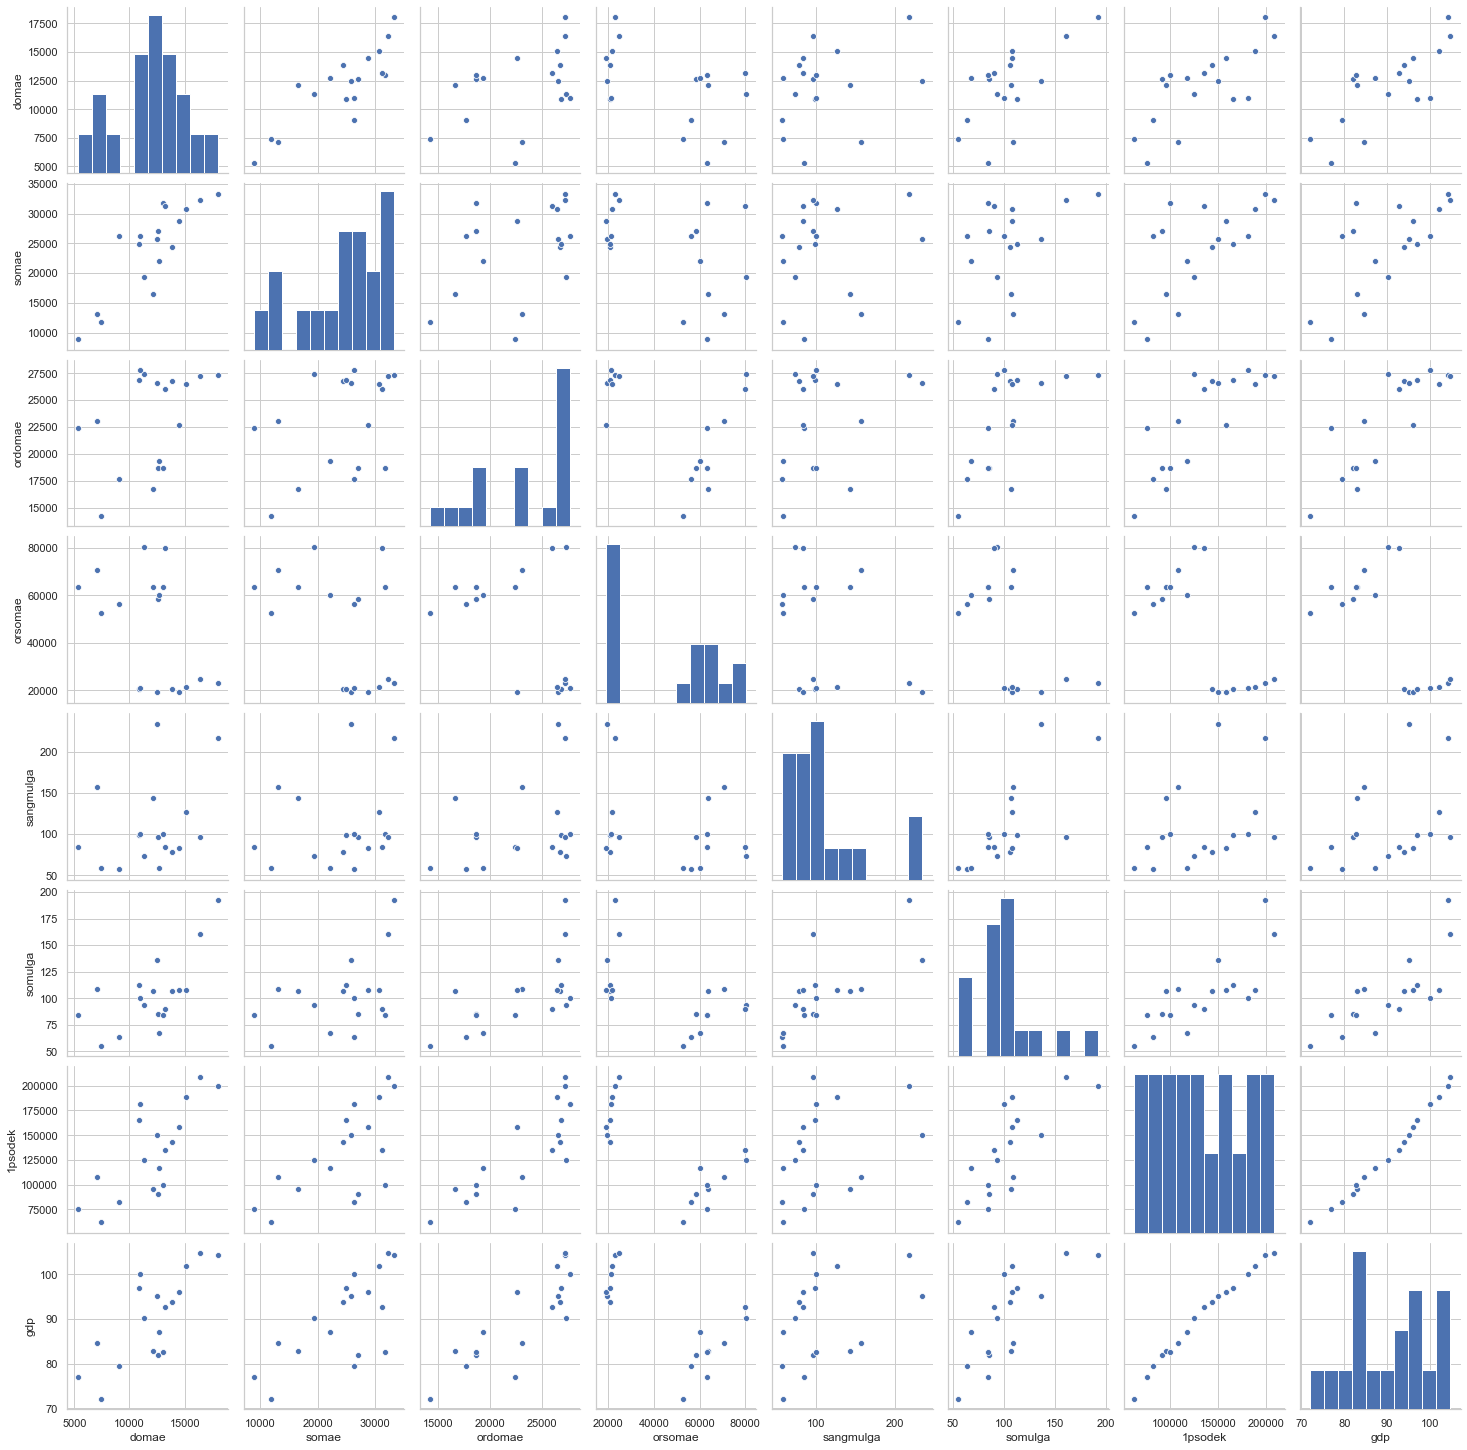

In [26]:

%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
sns.pairplot(X, height=2.5)
plt.show()
sns.reset_orig()

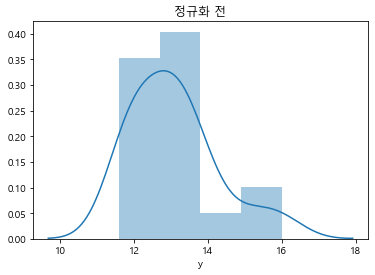

In [30]:
plt.title('정규화 전')
sns.distplot(data2['y'])

In [31]:
y = np.log1p(y)

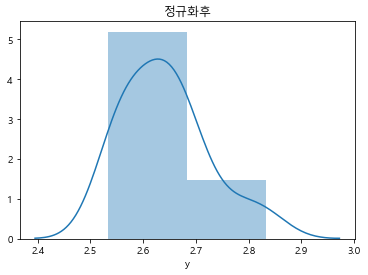

In [32]:
plt.title('정규화후')
sns.distplot(y)

In [53]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = data2.dtypes[data2.dtypes != 'object'].index

# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = data2[features_index].apply(lambda x : skew(x))

# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

sangmulga    1.382874
somulga      1.097593
dtype: float64


In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
def get_rmse(model):
    pred = model.predict(X)
    mse = mean_squared_error(y , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmse_nlog(model):
    pred = model.predict(X)
    mse = mean_squared_error(np.expm1(y) , pred)
    rmse = np.sqrt(mse)
    print('{0} expm후 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

def get_rmses_nlog(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse_nlog(model)
        rmses.append(rmse)
    return rmses

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X, y)

ridge_reg = Ridge()
ridge_reg.fit(X, y)

lasso_reg = Lasso()
lasso_reg.fit(X, y)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
get_rmses_nlog(models)

LinearRegression 로그 변환된 RMSE: 0.045
Ridge 로그 변환된 RMSE: 0.046
Lasso 로그 변환된 RMSE: 0.058
LinearRegression expm후 RMSE: 10.489
Ridge expm후 RMSE: 10.489
Lasso expm후 RMSE: 10.491


[10.488860971278324, 10.489050080999318, 10.490590054990438]

In [41]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X, y,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.195 0.149 0.097 0.059 0.18 ]
LinearRegression CV 평균 RMSE 값: 0.136

Ridge CV RMSE 값 리스트: [0.197 0.096 0.098 0.064 0.198]
Ridge CV 평균 RMSE 값: 0.131

Lasso CV RMSE 값 리스트: [0.172 0.12  0.105 0.083 0.128]
Lasso CV 평균 RMSE 값: 0.122


In [46]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_


In [48]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1600]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = get_best_params(xgb_reg, xgb_params)

[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [49]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':np.arange(1000,2100,100)}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = get_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.088, 최적 alpha:{'n_estimators': 1000}


C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


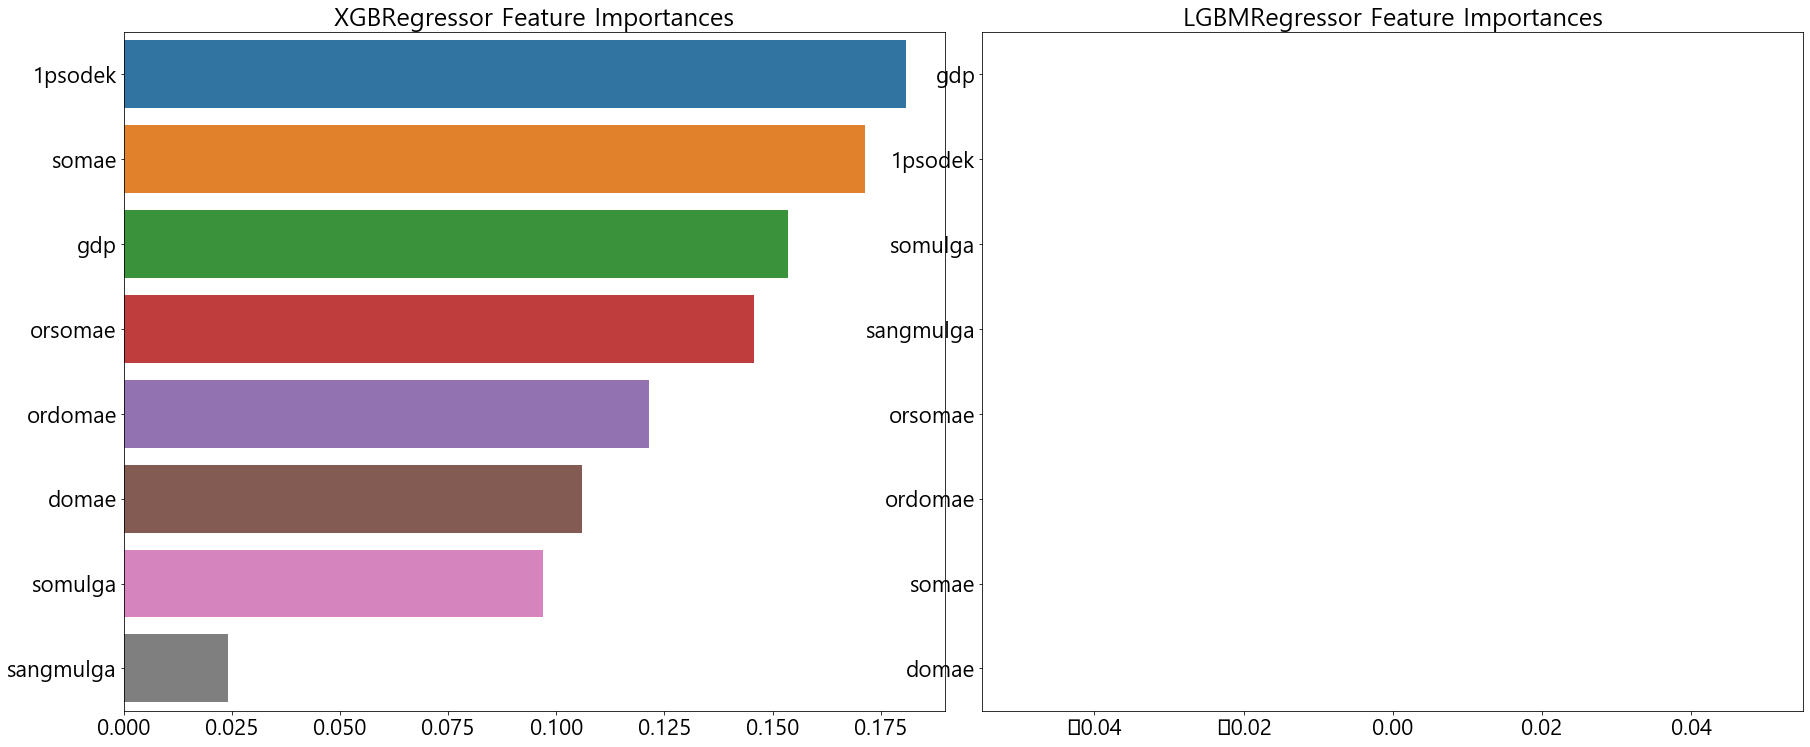

In [51]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 get_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)


In [62]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X, y)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X, y)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X)
lasso_pred = lasso_reg.predict(X)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)


최종 혼합 모델의 RMSE: 0.04617594535973058
Ridge 모델의 RMSE: 0.04903236045047071
Lasso 모델의 RMSE: 0.04541832749315459


C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019481598346068187, tolerance: 1.1285530475891329e-05
  positive)


In [63]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X, y)
lgbm_reg.fit(X, y)
xgb_pred = xgb_reg.predict(X)
lgbm_pred = lgbm_reg.predict(X)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)


[12:20:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 0.03970010539397444
XGBM 모델의 RMSE: 0.0005357508435379414
LGBM 모델의 RMSE: 0.07918168445589556
